#### Challenge: Factors that affect life expectancy

data source: https://www.kaggle.com/kumarajarshi/life-expectancy-who/home

##### Challenge:
Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

1. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

2. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

3. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

4. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)


engine.dispose()

##### question 1
Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

In [2]:
lifeexpectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
lifeexpectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


###### missing values

In [5]:
lifeexpectancy_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
lifeexpectancy_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [7]:
lifeexpectancy_df.columns.unique()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
#fix trailing/leading white space
lifeexpectancy_df.columns = lifeexpectancy_df.columns.str.strip()

In [9]:
lifeexpectancy_df.columns.unique()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

###### QUESTION: when using interpolation, value is filled using row above & below; most likely this would be from same country; would it be BETTER to to group by COUNTRY to get more precise value????
same question would apply to winsorizing or log-transforming values

In [10]:
#fill missing values with interpolation (time series/years)
fill_list = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 
             'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 
             'Population', 'thinness  1-19 years', 'thinness 5-9 years', 
             'Income composition of resources', 'Schooling'] 

for col in fill_list:
    lifeexpectancy_df.loc[:, col] = lifeexpectancy_df.loc[:, col].interpolate()

In [11]:
lifeexpectancy_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
lifeexpectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,82.474643,5.940955,82.246086,1.742103,7432.027910,1.229209e+07,4.882301,4.920439,0.634458,12.076804
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,23.420689,2.445751,23.705664,5.077785,13410.150286,5.471908e+07,4.433359,4.532488,0.209574,3.342316
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


###### outliers

###### no one on slack could help me either correct or come up with a function to iterate through the columns to calculate z-scores or IQR; I did each one individually, which I know is ridiculous. 

In [215]:
from scipy.stats import zscore

outliers = []

columns = lifeexpectancy_df.select_dtypes(exclude=['object']).columns.tolist()
print(columns)

for i in columns:
    threshold = 3 
    z_scores = zscore(lifeexpectancy_df[i])

    for threshold in range(3,5):
        print(i)  
        print('The score threshold is: {}'.format(threshold))
        print('Number of outliers is: {}'.format(len((np.where(z_scores > threshold)[0]))))
    
    


['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'winsorized_adult_mortality', 'winsorized_infant deaths', 'winsorized_Alcohol', 'winsorized_percentage expenditure', 'winsorized_Measles', 'winsorized_under-five deaths', 'winsorized_Polio', 'winsorized_Total expenditure', 'winsorized_Diphtheria', 'winsorized_HIV/AIDS', 'winsorized_GDP', 'winsorized_Population', 'winsorized_thinness  1-19 years', 'winsorized_thinness 5-9 years', 'log_infant deaths', 'log_percentage expenditure', 'log_Measles', 'log_under-five deaths', 'log_Diphtheria', 'log_HIV/AIDS', 'log_GDP', 'log_Population']
Year
The score threshold is: 3
Number of outliers is: 0
Year
The score threshold is: 4
Number of outliers is: 0
Life expectancy
The score 

In [176]:

columns = lifeexpectancy_df.select_dtypes(exclude=['object']).columns.tolist()
print(columns)

for i in columns:
    threshold = 3 
    q75, q25 = np.percentile(lifeexpectancy_df[i], [75 ,25])
    iqr = q75 - q25

    for threshold in np.arange(3,5,1):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print(i)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((lifeexpectancy_df[i] > max_val) 
                      | (lifeexpectancy_df[i] < min_val))[0]))
        ))

['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'winsorized_adult_mortality']
Year
The score threshold is: 3
Number of outliers is: 0
Year
The score threshold is: 4
Number of outliers is: 0
Life expectancy
The score threshold is: 3
Number of outliers is: 0
Life expectancy
The score threshold is: 4
Number of outliers is: 0
Adult Mortality
The score threshold is: 3
Number of outliers is: 5
Adult Mortality
The score threshold is: 4
Number of outliers is: 0
infant deaths
The score threshold is: 3
Number of outliers is: 158
infant deaths
The score threshold is: 4
Number of outliers is: 130
Alcohol
The score threshold is: 3
Number of outliers is: 0
Alcohol
The score threshold is: 4
Number of outliers is: 0
percentage e

In [65]:
from scipy.stats import zscore

z_scores = zscore(lifeexpectancy_df['Adult Mortality'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 405
The score threshold is: 2
Number of outliers is: 137
The score threshold is: 3
Number of outliers is: 40
The score threshold is: 4
Number of outliers is: 11


z_score indicates approx 51 outlier values
iqr_score indicates approx 5 values

In [110]:
q75, q25 = np.percentile(lifeexpectancy_df['Adult Mortality'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Adult Mortality'] > max_val) 
                      | (lifeexpectancy_df['Adult Mortality'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 176
The score threshold is: 2
Number of outliers is: 40
The score threshold is: 3
Number of outliers is: 5
The score threshold is: 4
Number of outliers is: 0


In [67]:
z_scores = zscore(lifeexpectancy_df['Life expectancy'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 400
The score threshold is: 2
Number of outliers is: 11
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


z_score indicates approx 0 outlier values
iqr_score indicates approx 0 values

In [111]:
q75, q25 = np.percentile(lifeexpectancy_df['Life expectancy'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Life expectancy'] > max_val) 
                      | (lifeexpectancy_df['Life expectancy'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 138
The score threshold is: 2
Number of outliers is: 1
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [69]:
z_scores = zscore(lifeexpectancy_df['infant deaths'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 110
The score threshold is: 2
Number of outliers is: 56
The score threshold is: 3
Number of outliers is: 37
The score threshold is: 4
Number of outliers is: 29


z_score indicates approx 66 outlier values
iqr_score indicates approx 288 values

In [112]:
q75, q25 = np.percentile(lifeexpectancy_df['infant deaths'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['infant deaths'] > max_val) 
                      | (lifeexpectancy_df['infant deaths'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 419
The score threshold is: 2
Number of outliers is: 226
The score threshold is: 3
Number of outliers is: 158
The score threshold is: 4
Number of outliers is: 130


In [71]:
z_scores = zscore(lifeexpectancy_df['Alcohol'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 583
The score threshold is: 2
Number of outliers is: 82
The score threshold is: 3
Number of outliers is: 4
The score threshold is: 4
Number of outliers is: 0


z_score indicates approx 4 outlier values
iqr_score indicates approx 0 values

In [113]:
q75, q25 = np.percentile(lifeexpectancy_df['Alcohol'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Alcohol'] > max_val) 
                      | (lifeexpectancy_df['Alcohol'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 18
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [73]:
z_scores = zscore(lifeexpectancy_df['percentage expenditure'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 222
The score threshold is: 2
Number of outliers is: 141
The score threshold is: 3
Number of outliers is: 84
The score threshold is: 4
Number of outliers is: 44


z_score indicates approx 128 outlier values
iqr_score indicates approx 558 values

In [114]:
q75, q25 = np.percentile(lifeexpectancy_df['percentage expenditure'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['percentage expenditure'] > max_val) 
                      | (lifeexpectancy_df['percentage expenditure'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 454
The score threshold is: 2
Number of outliers is: 349
The score threshold is: 3
Number of outliers is: 300
The score threshold is: 4
Number of outliers is: 258


In [75]:
z_scores = zscore(lifeexpectancy_df['Hepatitis B'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 0
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


z_score indicates approx 0 outlier values
iqr_score indicates approx 0 values

In [115]:
q75, q25 = np.percentile(lifeexpectancy_df['Hepatitis B'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Hepatitis B'] > max_val) 
                      | (lifeexpectancy_df['Hepatitis B'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 372
The score threshold is: 2
Number of outliers is: 190
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [77]:
z_scores = zscore(lifeexpectancy_df['Measles'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 112
The score threshold is: 2
Number of outliers is: 67
The score threshold is: 3
Number of outliers is: 48
The score threshold is: 4
Number of outliers is: 37


In [ ]:
z_score indicates approx 85 outlier values
iqr_score indicates approx 860 values

In [116]:
q75, q25 = np.percentile(lifeexpectancy_df['Measles'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Measles'] > max_val) 
                      | (lifeexpectancy_df['Measles'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 593
The score threshold is: 2
Number of outliers is: 513
The score threshold is: 3
Number of outliers is: 451
The score threshold is: 4
Number of outliers is: 409


In [79]:
z_scores = zscore(lifeexpectancy_df['BMI'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 522
The score threshold is: 2
Number of outliers is: 5
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


z_score indicates approx 0 outlier values
iqr_score indicates approx 0 values

In [117]:
q75, q25 = np.percentile(lifeexpectancy_df['BMI'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['BMI'] > max_val) 
                      | (lifeexpectancy_df['BMI'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 0
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [81]:
z_scores = zscore(lifeexpectancy_df['under-five deaths'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 104
The score threshold is: 2
Number of outliers is: 57
The score threshold is: 3
Number of outliers is: 34
The score threshold is: 4
Number of outliers is: 32


z_score indicates approx 66 outlier values
iqr_score indicates approx 340 values

In [118]:
q75, q25 = np.percentile(lifeexpectancy_df['under-five deaths'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['under-five deaths'] > max_val) 
                      | (lifeexpectancy_df['under-five deaths'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 465
The score threshold is: 2
Number of outliers is: 308
The score threshold is: 3
Number of outliers is: 195
The score threshold is: 4
Number of outliers is: 145


In [83]:
z_scores = zscore(lifeexpectancy_df['Polio'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 0
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


z_score indicates approx 0 outlier values
iqr_score indicates approx 173 values

In [119]:
q75, q25 = np.percentile(lifeexpectancy_df['Polio'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Polio'] > max_val) 
                      | (lifeexpectancy_df['Polio'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 361
The score threshold is: 2
Number of outliers is: 204
The score threshold is: 3
Number of outliers is: 173
The score threshold is: 4
Number of outliers is: 0


In [85]:
z_scores = zscore(lifeexpectancy_df['Total expenditure'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 461
The score threshold is: 2
Number of outliers is: 105
The score threshold is: 3
Number of outliers is: 26
The score threshold is: 4
Number of outliers is: 9


In [ ]:
z_score indicates approx 35 outlier values
iqr_score indicates approx 7 values

In [120]:
q75, q25 = np.percentile(lifeexpectancy_df['Total expenditure'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Total expenditure'] > max_val) 
                      | (lifeexpectancy_df['Total expenditure'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 122
The score threshold is: 2
Number of outliers is: 22
The score threshold is: 3
Number of outliers is: 7
The score threshold is: 4
Number of outliers is: 0


In [87]:
z_scores = zscore(lifeexpectancy_df['Diphtheria'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 0
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [ ]:
z_score indicates approx 0 outlier values
iqr_score indicates approx 172 values

In [121]:
q75, q25 = np.percentile(lifeexpectancy_df['Diphtheria'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Diphtheria'] > max_val) 
                      | (lifeexpectancy_df['Diphtheria'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 350
The score threshold is: 2
Number of outliers is: 232
The score threshold is: 3
Number of outliers is: 172
The score threshold is: 4
Number of outliers is: 0


In [89]:
z_scores = zscore(lifeexpectancy_df['HIV/AIDS'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 187
The score threshold is: 2
Number of outliers is: 105
The score threshold is: 3
Number of outliers is: 69
The score threshold is: 4
Number of outliers is: 52


In [ ]:
z_score indicates approx 121 outlier values
iqr_score indicates approx 747 values

In [122]:
q75, q25 = np.percentile(lifeexpectancy_df['HIV/AIDS'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['HIV/AIDS'] > max_val) 
                      | (lifeexpectancy_df['HIV/AIDS'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 584
The score threshold is: 2
Number of outliers is: 474
The score threshold is: 3
Number of outliers is: 403
The score threshold is: 4
Number of outliers is: 347


In [93]:
z_scores = zscore(lifeexpectancy_df['GDP'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 304
The score threshold is: 2
Number of outliers is: 176
The score threshold is: 3
Number of outliers is: 84
The score threshold is: 4
Number of outliers is: 36


In [ ]:
z_score indicates approx 120 outlier values
iqr_score indicates approx 406 values

In [123]:
q75, q25 = np.percentile(lifeexpectancy_df['GDP'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['GDP'] > max_val) 
                      | (lifeexpectancy_df['GDP'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 457
The score threshold is: 2
Number of outliers is: 304
The score threshold is: 3
Number of outliers is: 226
The score threshold is: 4
Number of outliers is: 180


In [98]:
z_scores = zscore(lifeexpectancy_df['Population'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 97
The score threshold is: 2
Number of outliers is: 53
The score threshold is: 3
Number of outliers is: 22
The score threshold is: 4
Number of outliers is: 11


In [ ]:
z_score indicates approx 33 outlier values
iqr_score indicates approx 434 values

In [125]:
q75, q25 = np.percentile(lifeexpectancy_df['Population'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Population'] > max_val) 
                      | (lifeexpectancy_df['Population'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 452
The score threshold is: 2
Number of outliers is: 327
The score threshold is: 3
Number of outliers is: 248
The score threshold is: 4
Number of outliers is: 186


In [100]:
z_scores = zscore(lifeexpectancy_df['thinness  1-19 years'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 356
The score threshold is: 2
Number of outliers is: 153
The score threshold is: 3
Number of outliers is: 53
The score threshold is: 4
Number of outliers is: 16


In [ ]:
z_score indicates approx 69 outlier values
iqr_score indicates approx 16 values

In [126]:
q75, q25 = np.percentile(lifeexpectancy_df['thinness  1-19 years'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['thinness  1-19 years'] > max_val) 
                      | (lifeexpectancy_df['thinness  1-19 years'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 185
The score threshold is: 2
Number of outliers is: 47
The score threshold is: 3
Number of outliers is: 16
The score threshold is: 4
Number of outliers is: 0


In [102]:
z_scores = zscore(lifeexpectancy_df['thinness 5-9 years'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 356
The score threshold is: 2
Number of outliers is: 147
The score threshold is: 3
Number of outliers is: 55
The score threshold is: 4
Number of outliers is: 16


In [ ]:
z_score indicates approx 71 outlier values
iqr_score indicates approx 16 values

In [127]:
q75, q25 = np.percentile(lifeexpectancy_df['thinness 5-9 years'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['thinness 5-9 years'] > max_val) 
                      | (lifeexpectancy_df['thinness 5-9 years'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 187
The score threshold is: 2
Number of outliers is: 51
The score threshold is: 3
Number of outliers is: 16
The score threshold is: 4
Number of outliers is: 0


In [104]:
z_scores = zscore(lifeexpectancy_df['Income composition of resources'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 394
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [ ]:
z_score indicates approx 0 outlier values
iqr_score indicates approx 0 values

In [128]:
q75, q25 = np.percentile(lifeexpectancy_df['Income composition of resources'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Income composition of resources'] > max_val) 
                      | (lifeexpectancy_df['Income composition of resources'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 130
The score threshold is: 2
Number of outliers is: 0
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [106]:
z_scores = zscore(lifeexpectancy_df['Schooling'])

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    #print("The indices of the outliers:")
    #print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
Number of outliers is: 429
The score threshold is: 2
Number of outliers is: 37
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [ ]:
z_score indicates approx 0 outlier values
iqr_score indicates approx 0 values

In [129]:
q75, q25 = np.percentile(lifeexpectancy_df['Schooling'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((lifeexpectancy_df['Schooling'] > max_val) 
                      | (lifeexpectancy_df['Schooling'] < min_val))[0]))
    ))

The score threshold is: 1
Number of outliers is: 200
The score threshold is: 2
Number of outliers is: 28
The score threshold is: 3
Number of outliers is: 0
The score threshold is: 4
Number of outliers is: 0


In [130]:
lifeexpectancy_df.columns.unique()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

##### transform outliers

###### now I'm going to windorize each outlier individually, again, ridiculous. But I can't seem to figure out how to do it, I'm already 3 weeks behind, and I can't take "too much" time to figure out how to do it. 

outliers = ['Adult Mortality', 'infant deaths', 'Alcohol', 
            'percentage expenditure', 'Measles', 'under-five deaths', 
            'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 
            'GDP', 'Population', 'thinness  1-19 years', 
            'thinness 5-9 years']

In [213]:
from scipy.stats.mstats import winsorize
lifeexpectancy_df['winsorized_adult_mortality'] = winsorize(lifeexpectancy_df['Adult Mortality'], (0, 0.05))
lifeexpectancy_df['winsorized_infant deaths'] = winsorize(lifeexpectancy_df['infant deaths'], (.10, 0.10))
lifeexpectancy_df['winsorized_Alcohol'] = winsorize(lifeexpectancy_df['Alcohol'], (0, 0.05))
lifeexpectancy_df['winsorized_percentage expenditure'] = winsorize(lifeexpectancy_df['percentage expenditure'], (0.10, 0.10))
lifeexpectancy_df['winsorized_Measles'] = winsorize(lifeexpectancy_df['Measles'], (0.10, 0.10))
lifeexpectancy_df['winsorized_under-five deaths'] = winsorize(lifeexpectancy_df['under-five deaths'], (0.10, 0.10))
lifeexpectancy_df['winsorized_Polio'] = winsorize(lifeexpectancy_df['Polio'], (.10, 0.05))
lifeexpectancy_df['winsorized_Total expenditure'] = winsorize(lifeexpectancy_df['Total expenditure'], (0, 0.05))
lifeexpectancy_df['winsorized_Diphtheria'] = winsorize(lifeexpectancy_df['Diphtheria'], (.10, 0.10))
lifeexpectancy_df['winsorized_HIV/AIDS'] = winsorize(lifeexpectancy_df['HIV/AIDS'], (0.10, 0.10))
lifeexpectancy_df['winsorized_GDP'] = winsorize(lifeexpectancy_df['GDP'], (0.10, 0.10))
lifeexpectancy_df['winsorized_Population'] = winsorize(lifeexpectancy_df['Population'], (0.10, 0.10))
lifeexpectancy_df['winsorized_thinness  1-19 years'] = winsorize(lifeexpectancy_df['thinness  1-19 years'], (0, 0.05))
lifeexpectancy_df['winsorized_thinness 5-9 years'] = winsorize(lifeexpectancy_df['thinness 5-9 years'], (0, 0.05))


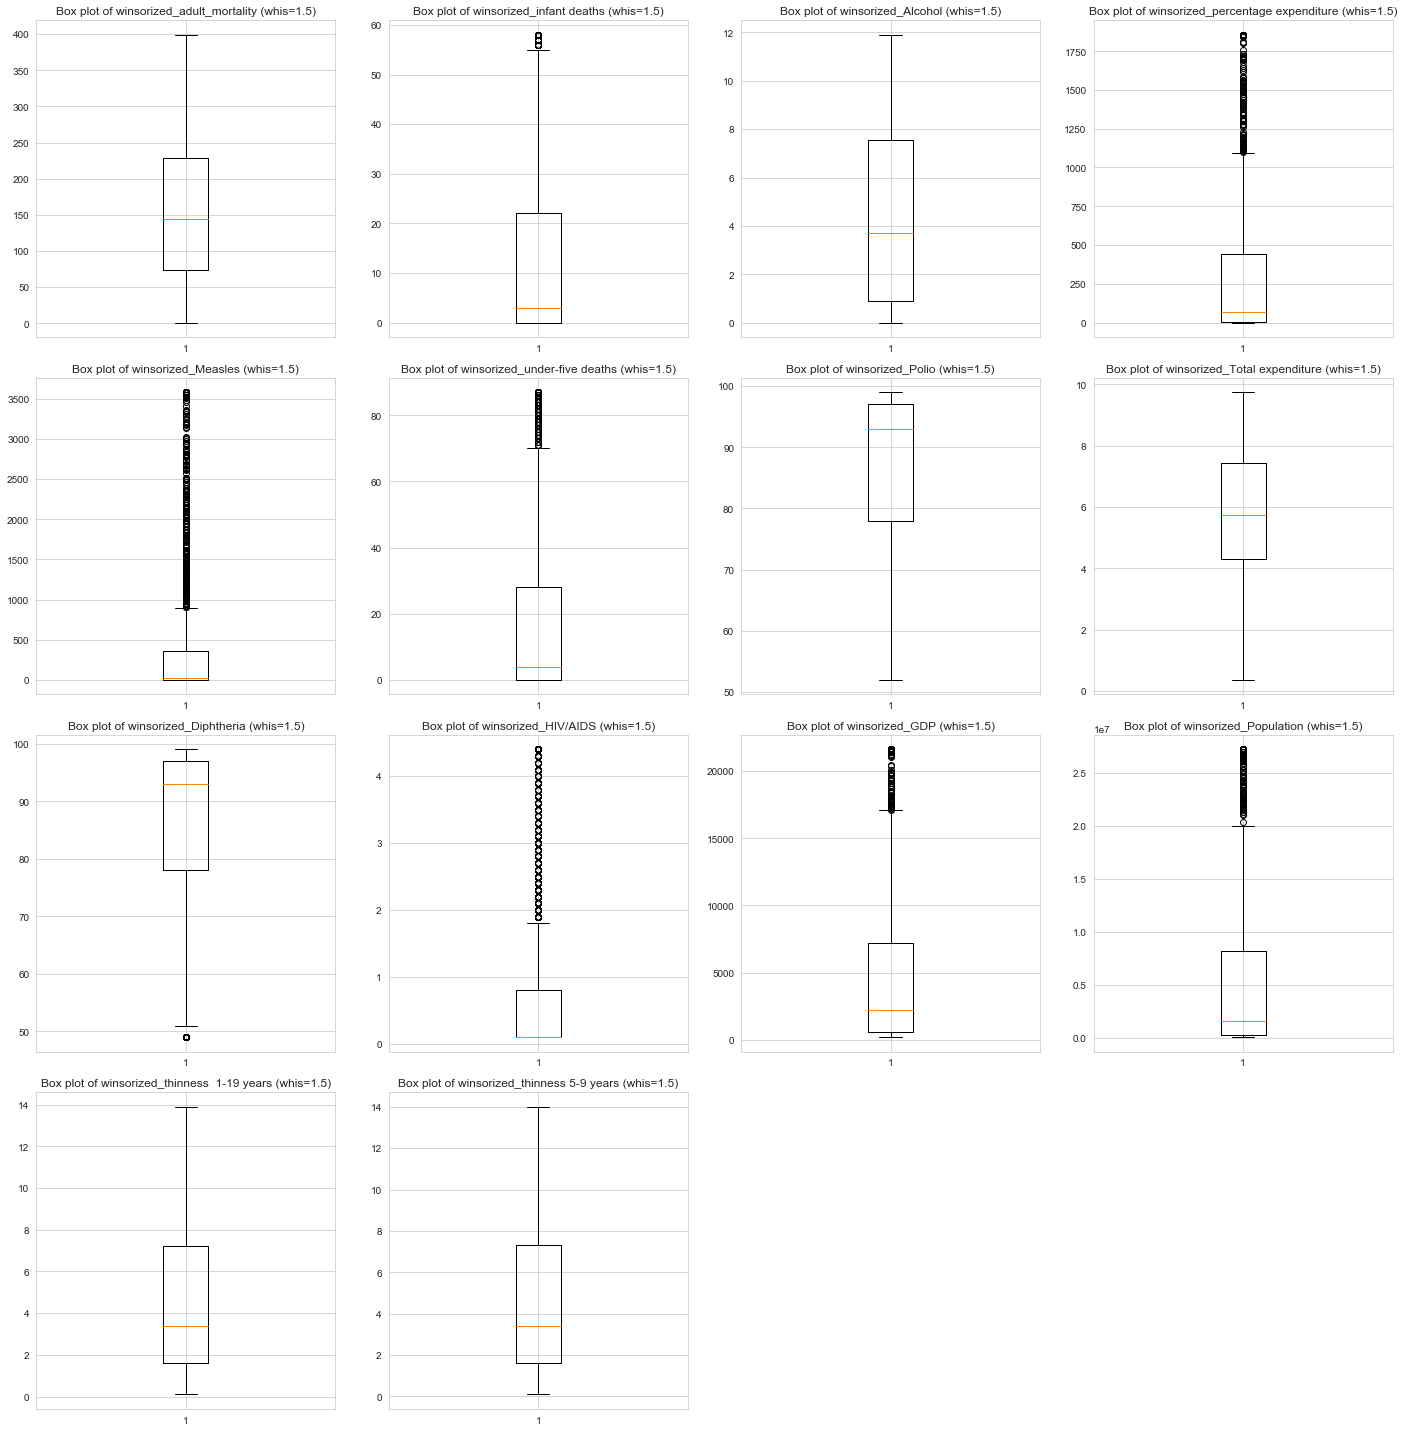

In [214]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.boxplot(lifeexpectancy_df['winsorized_adult_mortality'])
plt.title("Box plot of winsorized_adult_mortality (whis=1.5)")

plt.subplot(4,4,2)
plt.boxplot(lifeexpectancy_df['winsorized_infant deaths'])
plt.title("Box plot of winsorized_infant deaths (whis=1.5)")

plt.subplot(4,4,3)
plt.boxplot(lifeexpectancy_df['winsorized_Alcohol'])
plt.title("Box plot of winsorized_Alcohol (whis=1.5)")

plt.subplot(4,4,4)
plt.boxplot(lifeexpectancy_df['winsorized_percentage expenditure'])
plt.title("Box plot of winsorized_percentage expenditure (whis=1.5)")

plt.subplot(4,4,5)
plt.boxplot(lifeexpectancy_df['winsorized_Measles'])
plt.title("Box plot of winsorized_Measles (whis=1.5)")

plt.subplot(4,4,6)
plt.boxplot(lifeexpectancy_df['winsorized_under-five deaths'])
plt.title("Box plot of winsorized_under-five deaths (whis=1.5)")

plt.subplot(4,4,7)
plt.boxplot(lifeexpectancy_df['winsorized_Polio'])
plt.title("Box plot of winsorized_Polio (whis=1.5)")

plt.subplot(4,4,8)
plt.boxplot(lifeexpectancy_df['winsorized_Total expenditure'])
plt.title("Box plot of winsorized_Total expenditure (whis=1.5)")

plt.subplot(4,4,9)
plt.boxplot(lifeexpectancy_df['winsorized_Diphtheria'])
plt.title("Box plot of winsorized_Diphtheria (whis=1.5)")

plt.subplot(4,4,10)
plt.boxplot(lifeexpectancy_df['winsorized_HIV/AIDS'])
plt.title("Box plot of winsorized_HIV/AIDS (whis=1.5)")

plt.subplot(4,4,11)
plt.boxplot(lifeexpectancy_df['winsorized_GDP'])
plt.title("Box plot of winsorized_GDP (whis=1.5)")

plt.subplot(4,4,12)
plt.boxplot(lifeexpectancy_df['winsorized_Population'])
plt.title("Box plot of winsorized_Population (whis=1.5)")

plt.subplot(4,4,13)
plt.boxplot(lifeexpectancy_df['winsorized_thinness  1-19 years'])
plt.title("Box plot of winsorized_thinness  1-19 years (whis=1.5)")

plt.subplot(4,4,14)
plt.boxplot(lifeexpectancy_df['winsorized_thinness 5-9 years'])
plt.title("Box plot of winsorized_thinness 5-9 years (whis=1.5)")


plt.tight_layout()
plt.show()

After winsorization, several variables remain with outliers. Will log_transform these variables. 

In [210]:

lifeexpectancy_df['log_infant deaths'] = np.log(lifeexpectancy_df['infant deaths'])

lifeexpectancy_df['log_percentage expenditure'] = np.log(lifeexpectancy_df['percentage expenditure'])
lifeexpectancy_df['log_Measles'] = np.log(lifeexpectancy_df['Measles'])
lifeexpectancy_df['log_under-five deaths'] = np.log(lifeexpectancy_df['under-five deaths'])


lifeexpectancy_df['log_Diphtheria'] = np.log(lifeexpectancy_df['Diphtheria'])
lifeexpectancy_df['log_HIV/AIDS'] = np.log(lifeexpectancy_df['HIV/AIDS'])
lifeexpectancy_df['log_GDP'] = np.log(lifeexpectancy_df['GDP'])
lifeexpectancy_df['log_Population'] = np.log(lifeexpectancy_df['Population'])


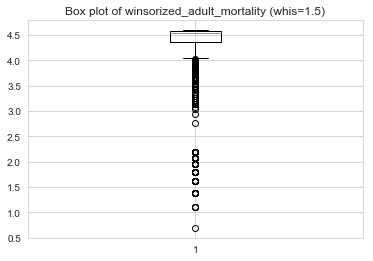

In [212]:
plt.boxplot(lifeexpectancy_df['log_Diphtheria'])
plt.title("Box plot of winsorized_adult_mortality (whis=1.5)")
plt.show()

In [ ]:
plt.boxplot(np.log(youtube_df["Video views"]))

##### question 2 
Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

##### question 3
In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

##### question 4 
Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.